<a href="https://colab.research.google.com/github/Paulinohpp/Analise-de-Dados/blob/main/Projeto%20Final%20-%20Economia%20-%20Parte%2001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Final - Economia - Parte 01

*   **Escola**: SouCode Academy
*   **Curso**: Bootcamp Analista de Dados - Martech - AD2
*   **Professores**: Douglas Ribeiro, Franciane Rodrigues e Jonathas Carneiro
*   **Equipe**: Ângelo Máximo, Bianka Cristina, Bruno Nunes, Paulo Paulino, Samira Cavalcanti e Vagner Pereira








### **Dicionario**


* `date`: Data dos dados da linha - dados mensais
* `econ_act`: atividade econômica (% var últimos 12 meses)
* `unemploy`: taxa de desemprego (% últimos 12 meses)
* `credit_cost`: custo do crédito (% ao ano)
* `ent_debt`: dívida das empresas (% var últimos 12 meses)
* `peo_debt`: dívida de pessoas (% var últimos 12 meses)
* `perm_ext_inv`: investimentos estrangeiros permanentes (% do PIB últimos 12 meses)
* `bal_comex`: transações correntes (% do PIB últimos 12 meses)
* `int_reserves`: Reservas internacionais brasileiras (em US$ bilhões)
* `nom_res`: resultado nominal (% do PIB últimos 12 meses)
* `prim_res`: resultado primário (% do PIB últimos 12 meses)
* `gross_debt_gov`: Dívida bruta do governo (% do PIB últimos 12 meses)
* `net_debt_gov`: Dívida líquida do governo (% do PIB)
* `int_inv_pos`: Posição de investimento internacional (% do PIB)
* `inflation`: Inflação (var % em 12 meses)
* `interest_rate`: Taxa de Juros (% por ano)
* `usd_brl`: (taxa de câmbio USD / BRL)

### **Pergunta de Negocio**

Qual impacto da pandemia de Covid-19 na economia nacional e internacional?

### Extração

In [ ]:
!pip install pandera
!pip install gcsfs

In [ ]:
# Importando as libs
import pandas as pd
import numpy as np
import os
import pandera as pa
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import storage
from datetime import datetime

In [ ]:
# CONFIGURANDO DA CHAVE DE SEGURANCA - ACESSO O PROJETO
serviceAccount = '/content/subtle-tooling-389812-9e24fa86cd86.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
# Configurações Google Cloud Storage - ACESSO AO BUCKET
client = storage.Client()
bucket = client.get_bucket('final-project-soulcode')
bucket.blob('brazil_economy_indicators.csv')
path = 'gs://final-project-soulcode/brazil_economy_indicators.csv'

In [ ]:
# Abertura da base de dados e cópia de segurança (bucket)
df = pd.read_csv(path, sep=',')

In [ ]:
display(df)

,date,econ_act,unemploy,credit_cost,ent_debt,peo_debt,perm_ext_inv,bal_comex,int_reserves,nom_res,prim_res,gross_debt_gov,net_debt_gov,int_inv_pos,inflation,interest_rate,usd_brl
0,01/10/2012,1.03,7.0,NaN,NaN,NaN,3.65,-3.24,377.753,-2.50,2.07,54.52,32.44,-32.3,5.45,7.50,2.0260
1,01/11/2012,1.04,6.8,NaN,NaN,NaN,3.83,-3.31,378.560,-2.73,1.77,54.65,32.08,-32.3,5.53,7.25,2.0312
2,01/12/2012,0.90,6.9,NaN,NaN,NaN,3.76,-3.43,373.147,-2.26,2.18,53.67,32.19,-32.3,5.84,7.25,2.1050
3,01/01/2013,1.21,7.3,19.94,NaN,NaN,3.57,-3.47,373.417,-2.22,2.25,53.98,32.17,-33.9,6.15,7.25,2.0420
4,01/02/2013,1.31,7.8,19.98,7.56,3.8,3.48,-3.52,373.742,-2.50,1.98,54.03,32.59,-33.9,6.31,7.25,1.9843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,01/06/2022,2.18,9.3,20.50,29.75,4.8,3.67,-2.10,341.958,-4.23,2.17,78.02,57.82,NaN,11.89,12.75,4.7765
117,01/07/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,346.403,-3.83,2.48,77.61,57.34,-40.0,10.07,13.25,5.3142
118,01/08/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.20,56.50,-40.0,8.73,13.25,5.1606
119,01/09/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.17,13.75,5.2007


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            121 non-null    object 
 1   econ_act        117 non-null    float64
 2   unemploy        117 non-null    float64
 3   credit_cost     114 non-null    float64
 4   ent_debt        113 non-null    float64
 5   peo_debt        113 non-null    float64
 6   perm_ext_inv    117 non-null    float64
 7   bal_comex       117 non-null    float64
 8   int_reserves    118 non-null    float64
 9   nom_res         118 non-null    float64
 10  prim_res        118 non-null    float64
 11  gross_debt_gov  119 non-null    float64
 12  net_debt_gov    119 non-null    float64
 13  int_inv_pos     118 non-null    float64
 14  inflation       121 non-null    float64
 15  interest_rate   121 non-null    float64
 16  usd_brl         121 non-null    float64
dtypes: float64(16), object(1)
memory us

In [ ]:
# Verificando dados nulos, ausente etc 1
df.isna().sum()

date              0
econ_act          4
unemploy          4
credit_cost       7
ent_debt          8
peo_debt          8
perm_ext_inv      4
bal_comex         4
int_reserves      3
nom_res           3
prim_res          3
gross_debt_gov    2
net_debt_gov      2
int_inv_pos       3
inflation         0
interest_rate     0
usd_brl           0
dtype: int64

In [ ]:
# Verificando dados nulos, ausente etc 2
df.isnull().sum()

date              0
econ_act          4
unemploy          4
credit_cost       7
ent_debt          8
peo_debt          8
perm_ext_inv      4
bal_comex         4
int_reserves      3
nom_res           3
prim_res          3
gross_debt_gov    2
net_debt_gov      2
int_inv_pos       3
inflation         0
interest_rate     0
usd_brl           0
dtype: int64

### Transformação

In [ ]:
# Transformando o atributo Date para DateTime
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            121 non-null    datetime64[ns]
 1   econ_act        117 non-null    float64       
 2   unemploy        117 non-null    float64       
 3   credit_cost     114 non-null    float64       
 4   ent_debt        113 non-null    float64       
 5   peo_debt        113 non-null    float64       
 6   perm_ext_inv    117 non-null    float64       
 7   bal_comex       117 non-null    float64       
 8   int_reserves    118 non-null    float64       
 9   nom_res         118 non-null    float64       
 10  prim_res        118 non-null    float64       
 11  gross_debt_gov  119 non-null    float64       
 12  net_debt_gov    119 non-null    float64       
 13  int_inv_pos     118 non-null    float64       
 14  inflation       121 non-null    float64       
 15  intere

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 4 to 115
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            112 non-null    datetime64[ns]
 1   econ_act        112 non-null    float64       
 2   unemploy        112 non-null    float64       
 3   credit_cost     112 non-null    float64       
 4   ent_debt        112 non-null    float64       
 5   peo_debt        112 non-null    float64       
 6   perm_ext_inv    112 non-null    float64       
 7   bal_comex       112 non-null    float64       
 8   int_reserves    112 non-null    float64       
 9   nom_res         112 non-null    float64       
 10  prim_res        112 non-null    float64       
 11  gross_debt_gov  112 non-null    float64       
 12  net_debt_gov    112 non-null    float64       
 13  int_inv_pos     112 non-null    float64       
 14  inflation       112 non-null    float64       
 15  intere

In [ ]:
# Verificando dados nulos, ausente etc 1
df.isna().sum()

date              0
econ_act          0
unemploy          0
credit_cost       0
ent_debt          0
peo_debt          0
perm_ext_inv      0
bal_comex         0
int_reserves      0
nom_res           0
prim_res          0
gross_debt_gov    0
net_debt_gov      0
int_inv_pos       0
inflation         0
interest_rate     0
usd_brl           0
dtype: int64

In [ ]:
# Verificando dados nulos, ausente etc 2
df.isnull().sum()

date              0
econ_act          0
unemploy          0
credit_cost       0
ent_debt          0
peo_debt          0
perm_ext_inv      0
bal_comex         0
int_reserves      0
nom_res           0
prim_res          0
gross_debt_gov    0
net_debt_gov      0
int_inv_pos       0
inflation         0
interest_rate     0
usd_brl           0
dtype: int64

In [ ]:
# Criando filtro de data
filtro_covid = (df['date'] >= '2019-12-01') & (df['date'] <= '2022-12-31')
filtro_antes_covid = (df['date'] >= '2017-01-01') & (df['date'] <= '2019-12-31')
filtro_periodo = (df['date'] >= '2017-01-01') & (df['date'] <= '2022-12-31')

# Criando um novo DataFrame no perido do Covid-19 (Janeiro de 2020 até Maio de 2022)
df_covid = df[filtro_covid]
df_antes_covid = df[filtro_antes_covid]
df_periodo = df[filtro_periodo]

In [ ]:
df_covid.head()

,date,econ_act,unemploy,credit_cost,ent_debt,peo_debt,perm_ext_inv,bal_comex,int_reserves,nom_res,prim_res,gross_debt_gov,net_debt_gov,int_inv_pos,inflation,interest_rate,usd_brl
87,2020-01-01,1.00,11.4,20.14,14.14,22.28,3.71,-3.57,359.394,-5.88,-0.71,74.82,53.23,-23.9,4.19,4.50,4.0520
88,2020-01-02,0.79,11.8,20.25,13.96,20.70,3.52,-3.72,362.460,-5.91,-0.78,75.30,52.65,-23.9,4.01,4.50,4.2380
89,2020-01-03,0.78,12.4,20.06,18.58,21.33,3.81,-3.77,343.165,-6.13,-0.85,77.03,50.80,-23.9,3.30,4.25,4.4880
90,2020-01-04,-0.54,12.7,19.76,19.06,18.62,3.71,-3.58,339.317,-7.35,-2.22,78.41,51.83,-26.1,2.40,3.75,5.2404
91,2020-01-05,-2.16,13.1,19.20,16.11,15.30,3.49,-3.46,345.706,-8.66,-3.84,80.44,54.04,-26.1,1.88,3.75,5.5350


In [ ]:
df_antes_covid.head()

,date,econ_act,unemploy,credit_cost,ent_debt,peo_debt,perm_ext_inv,bal_comex,int_reserves,nom_res,prim_res,gross_debt_gov,net_debt_gov,int_inv_pos,inflation,interest_rate,usd_brl
51,2017-01-01,-3.47,12.7,22.84,-10.74,-6.66,4.40,-1.41,367.708,-8.48,-2.33,69.81,46.46,-34.3,5.35,13.75,3.2730
52,2017-01-02,-3.22,13.3,22.98,-11.55,-5.84,4.25,-1.34,368.981,-8.47,-2.33,70.39,47.26,-34.3,4.76,13.00,3.1479
53,2017-01-03,-2.59,13.9,22.73,-10.51,-3.01,4.29,-1.23,370.111,-9.13,-2.33,71.24,47.53,-34.3,4.57,12.25,3.0976
54,2017-01-04,-2.35,13.7,22.46,-10.42,-1.35,4.14,-1.23,374.945,-9.14,-2.28,71.37,47.48,-30.8,4.08,12.25,3.1230
55,2017-01-05,-1.82,13.4,22.28,-10.36,1.08,3.93,-1.19,376.491,-9.19,-2.46,72.33,48.00,-30.8,3.60,11.25,3.1720


In [ ]:
display(df_periodo)

,date,econ_act,unemploy,credit_cost,ent_debt,peo_debt,perm_ext_inv,bal_comex,int_reserves,nom_res,prim_res,gross_debt_gov,net_debt_gov,int_inv_pos,inflation,interest_rate,usd_brl
51,2017-01-01,-3.47,12.7,22.84,-10.74,-6.66,4.40,-1.41,367.708,-8.48,-2.33,69.81,46.46,-34.3,5.35,13.75,3.2730
52,2017-01-02,-3.22,13.3,22.98,-11.55,-5.84,4.25,-1.34,368.981,-8.47,-2.33,70.39,47.26,-34.3,4.76,13.00,3.1479
53,2017-01-03,-2.59,13.9,22.73,-10.51,-3.01,4.29,-1.23,370.111,-9.13,-2.33,71.24,47.53,-34.3,4.57,12.25,3.0976
54,2017-01-04,-2.35,13.7,22.46,-10.42,-1.35,4.14,-1.23,374.945,-9.14,-2.28,71.37,47.48,-30.8,4.08,12.25,3.1230
55,2017-01-05,-1.82,13.4,22.28,-10.36,1.08,3.93,-1.19,376.491,-9.19,-2.46,72.33,48.00,-30.8,3.60,11.25,3.1720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2022-01-01,4.82,11.2,18.96,23.82,12.88,2.95,-1.71,358.398,-3.64,1.24,79.88,56.87,-41.9,10.38,9.25,5.6310
112,2022-01-02,4.92,11.2,19.38,26.92,13.02,3.11,-1.59,357.740,-3.41,1.41,79.72,57.47,-41.9,10.54,9.25,5.2810
113,2022-01-03,4.62,11.1,19.48,31.52,12.43,3.08,-1.42,353.169,-3.17,1.39,79.09,58.65,-41.9,11.30,10.75,5.0480
114,2022-01-04,3.49,10.5,19.91,31.68,10.42,3.38,-1.57,345.097,-3.93,1.53,78.95,58.33,-40.0,12.13,11.75,4.6984


In [ ]:
df_antes_covid.describe()

,econ_act,unemploy,credit_cost,ent_debt,peo_debt,perm_ext_inv,bal_comex,int_reserves,nom_res,prim_res,gross_debt_gov,net_debt_gov,int_inv_pos,inflation,interest_rate,usd_brl
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,0.387500,12.438889,21.349167,5.136111,12.965556,3.783056,-2.063889,377.914917,-7.478889,-1.701389,74.718611,51.366667,-33.525000,3.620833,7.694444,3.585781
std,1.486485,0.631677,0.685684,9.791258,7.932129,0.364518,0.855621,6.382613,1.086845,0.534251,1.921952,2.166419,4.161276,0.835934,2.311548,0.371969
min,-3.470000,11.100000,20.280000,-11.550000,-6.660000,3.110000,-3.540000,356.884000,-9.450000,-2.870000,69.810000,46.460000,-41.900000,2.460000,5.000000,3.097600
25%,-0.055000,11.975000,20.870000,-4.352500,10.577500,3.470000,-2.770000,375.512000,-8.472500,-2.292500,73.715000,50.482500,-35.275000,2.855000,6.500000,3.248175
50%,1.080000,12.400000,21.155000,10.200000,15.875000,3.880000,-2.040000,379.538500,-7.150000,-1.460000,75.285000,51.400000,-34.000000,3.515000,6.500000,3.683350
75%,1.345000,12.800000,21.695000,13.095000,17.057500,4.020000,-1.220000,381.281250,-6.777500,-1.320000,76.140000,53.100000,-31.775000,4.412500,8.500000,3.876150
max,1.620000,13.900000,22.980000,15.530000,22.610000,4.400000,-0.990000,388.092000,-5.810000,-0.840000,77.510000,54.700000,-26.200000,5.350000,13.750000,4.226000


In [ ]:
df_covid.describe()

,econ_act,unemploy,credit_cost,ent_debt,peo_debt,perm_ext_inv,bal_comex,int_reserves,nom_res,prim_res,gross_debt_gov,net_debt_gov,int_inv_pos,inflation,interest_rate,usd_brl
count,29.000000,29.000000,29.000000,29.00000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,0.406207,13.024138,18.284483,12.08931,11.963103,3.234483,-2.047241,355.236483,-8.248966,-3.692759,82.721379,57.946552,-32.531034,6.691379,4.810345,5.230203
std,3.535468,1.563342,1.182058,10.51338,4.870823,0.343008,0.831959,7.746253,3.842597,4.105665,4.281401,2.937831,6.415278,3.495332,3.138652,0.415824
min,-4.240000,9.800000,16.740000,-5.29000,2.840000,2.610000,-3.770000,339.317000,-13.690000,-9.410000,74.820000,50.800000,-41.900000,1.880000,2.000000,4.052000
25%,-3.430000,11.600000,17.240000,3.20000,9.260000,3.060000,-2.220000,350.996000,-12.660000,-8.300000,79.720000,57.030000,-39.900000,3.920000,2.250000,5.138000
50%,0.790000,13.100000,17.940000,12.40000,11.680000,3.180000,-1.670000,355.620000,-7.270000,-2.860000,82.330000,58.670000,-30.400000,6.100000,3.750000,5.281000
75%,4.210000,14.500000,19.380000,18.58000,14.340000,3.450000,-1.490000,358.398000,-4.710000,-0.240000,86.800000,60.040000,-26.100000,10.250000,6.250000,5.535000
max,4.920000,14.900000,20.250000,31.68000,22.280000,3.880000,-1.300000,370.395000,-3.170000,1.530000,89.000000,62.540000,-23.900000,12.130000,11.750000,5.693000


### Carregamento

In [ ]:
'''# Google Cloud - Utilizar se for o rotulo padrão (Salvando no Cloud com o nome Airbnb_Tratado)
df_covid.to_csv('gs://final-project-soulcode/df_covid.csv',index=False)
df_antes_covid.to_csv('gs://final-project-soulcode/df_antes_covid.csv',index=False)'''

"# Google Cloud - Utilizar se for o rotulo padrão (Salvando no Cloud com o nome Airbnb_Tratado)\ndf_covid.to_csv('gs://final-project-soulcode/df_covid.csv',index=False)\ndf_antes_covid.to_csv('gs://final-project-soulcode/df_antes_covid.csv',index=False)"

<ipython-input-23-3a2ee83b67da>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_periodo['date'] = pd.to_datetime(df_periodo['date'])
<ipython-input-23-3a2ee83b67da>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_periodo['year_month'] = df_periodo['date'].dt.to_period('M')
<ipython-input-23-3a2ee83b67da>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only colu

TypeError: ignored

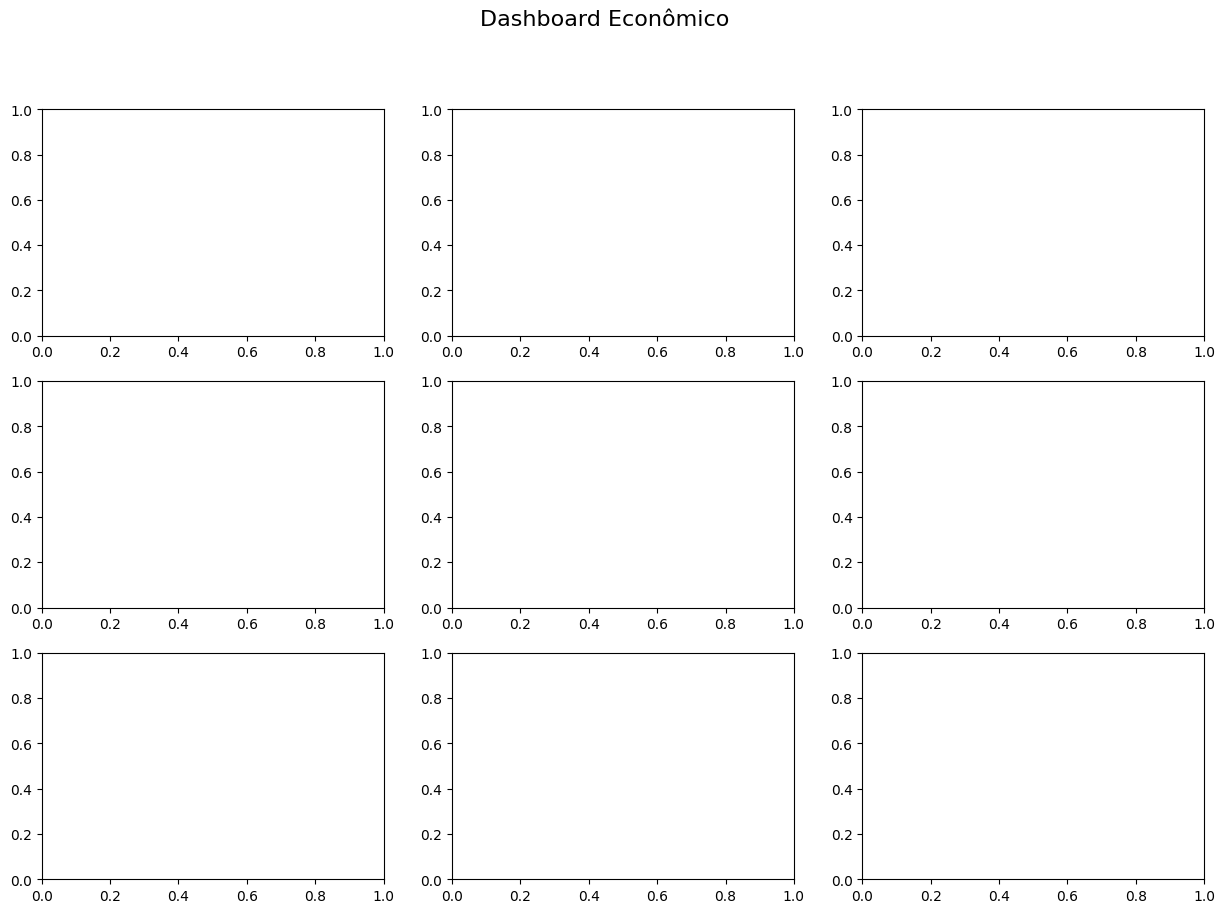

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Ajustando a coluna 'date' para ser interpretada como data completa (ano, mês e dia)
df_periodo['date'] = pd.to_datetime(df_periodo['date'])

# Criando uma nova coluna 'year_month' para agrupar por mês e ano
df_periodo['year_month'] = df_periodo['date'].dt.to_period('M')

# Agrupando os dados por mês e ano e calculando as médias mensais para cada variável econômica
df_monthly = df_periodo.groupby('year_month').mean().reset_index()

# Criação da figura e dos subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.suptitle('Dashboard Econômico', fontsize=16)

# Gráfico 1: Linha do tempo da Atividade Econômica
axs[0, 0].plot(df_monthly['year_month'], df_monthly['econ_act'])
axs[0, 0].set_title('Atividade Econômica')
axs[0, 0].set_ylabel('Variação (%)')

# Gráfico 2: Taxa de Desemprego ao longo do tempo
axs[0, 1].plot(df_monthly['year_month'], df_monthly['unemploy'])
axs[0, 1].set_title('Taxa de Desemprego')
axs[0, 1].set_ylabel('Taxa (%)')

# Gráfico 3: Comparação entre Dívida das Empresas e Dívida de Pessoas
axs[0, 2].plot(df_monthly['year_month'], df_monthly['ent_debt'], label='Dívida das Empresas')
axs[0, 2].plot(df_monthly['year_month'], df_monthly['peo_debt'], label='Dívida de Pessoas')
axs[0, 2].set_title('Dívida Empresas vs. Dívida Pessoas')
axs[0, 2].set_ylabel('Variação (%)')
axs[0, 2].legend()

# Gráfico 4: Investimentos Estrangeiros vs. Transações Correntes
axs[1, 0].plot(df_monthly['year_month'], df_monthly['perm_ext_inv'], label='Investimentos Estrangeiros')
axs[1, 0].plot(df_monthly['year_month'], df_monthly['bal_comex'], label='Transações Correntes')
axs[1, 0].set_title('Investimentos Estrangeiros vs. Transações Correntes')
axs[1, 0].set_ylabel('Porcentagem do PIB')
axs[1, 0].legend()

# Gráfico 5: Reservas Internacionais Brasileiras
axs[1, 1].plot(df_monthly['year_month'], df_monthly['int_reserves'])
axs[1, 1].set_title('Reservas Internacionais')
axs[1, 1].set_ylabel('US$ bilhões')

# Gráfico 6: Resultados Fiscal do Governo
axs[1, 2].plot(df_monthly['year_month'], df_monthly['nom_res'], label='Resultado Nominal')
axs[1, 2].plot(df_monthly['year_month'], df_monthly['prim_res'], label='Resultado Primário')
axs[1, 2].set_title('Resultados Fiscal do Governo')
axs[1, 2].set_ylabel('Porcentagem do PIB')
axs[1, 2].legend()

# Gráfico 7: Dívida do Governo
axs[2, 0].plot(df_monthly['year_month'], df_monthly['gross_debt_gov'], label='Dívida Bruta do Governo')
axs[2, 0].plot(df_monthly['year_month'], df_monthly['net_debt_gov'], label='Dívida Líquida do Governo')
axs[2, 0].set_title('Dívida do Governo')
axs[2, 0].set_ylabel('Porcentagem do PIB')
axs[2, 0].legend()

# Gráfico 8: Posição de Investimento Internacional
axs[2, 1].plot(df_monthly['year_month'], df_monthly['int_inv_pos'])
axs[2, 1].set_title('Posição de Investimento Internacional')
axs[2, 1].set_ylabel('Porcentagem do PIB')

# Gráfico 9: Inflação e Taxa de Juros
axs[2, 2].plot(df_monthly['year_month'], df_monthly['inflation'], label='Inflação (var % em 12 meses)')
axs[2, 2].plot(df_monthly['year_month'], df_monthly['interest_rate'], label='Taxa de Juros')
axs[2, 2].set_title('Inflação e Taxa de Juros')
axs[2, 2].set_ylabel('Porcentagem')
axs[2, 2].legend()

# Ajuste do layout e exibição do dashboard
plt.tight_layout()
plt.show()


In [ ]:
'''df_periodo['year'] = df_periodo['date'].dt.year


# Agrupando os dados por ano e calculando a média para o atributo 'unemploy'
df_teste = df_periodo.groupby('year')['unemploy'].mean()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras (subplot 1)
df_teste.plot.bar(ax=axes[0])
axes[0].set_xlabel('Ano')
axes[0].set_ylabel('Média Percentual da Taxa de Desemprego')
axes[0].set_title('Média Percentual da Taxa de Desemprego por Ano')

# Gráfico de linha (subplot 2)
df_teste.plot.line(ax=axes[1])
axes[1].set_xlabel('Ano')
axes[1].set_ylabel('Média Percentual da Taxa de Desemprego')
axes[1].set_title('Evolução da taxa de desemprego ao longo dos anos')

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()'''

In [ ]:
'''# Agrupando os dados por ano e calculando a média para o atributo 'ent_debt'
df_teste2 = df_periodo.groupby('year')['ent_debt'].mean()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras (subplot 1)
df_teste2.plot.bar(ax=axes[0])
axes[0].set_xlabel('Ano')
axes[0].set_ylabel('Média da variação da divida das empresas')
axes[0].set_title('Média da variação da divida das empresas por Ano')

# Gráfico de linha (subplot 2)
df_teste2.plot.line(ax=axes[1])
axes[1].set_xlabel('Ano')
axes[1].set_ylabel('Média da variação da divida das empresas')
axes[1].set_title('Evolução da variação da divida das empresas ao longo dos anos')

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()'''

In [ ]:
'''
r = 0,9 a 1 (positivo ou negativo): correlação muito forte;
r = 0,7 a 09 (positivo ou negativo): correlação forte;
r = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
r = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
r = 0 a 0,3 (positivo ou negativo): não possui correlação.
'''

correlacao = df_periodo.corr()

# Plotar o heatmap
plt.figure(figsize=(10, 8))  # Tamanho da figura
sns.heatmap(correlacao, annot=True, cmap="coolwarm", fmt=".2f")  # Plotar o heatmap
plt.title("Matriz de Correlação")  # Título do gráfico

# Exibir o gráfico
plt.show()